In [1]:
!pip3 uninstall keras
!pip3 install keras==2.2.4

Uninstalling Keras-2.3.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras-2.3.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.3.1
     |████████████████████████████████| 317kB 4.8MB/s 


In [2]:
!pip3 uninstall tensorflow
!pip3 install tensorflow-gpu==1.14

Uninstalling tensorflow-2.2.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0
     |████████████████████████████████| 377.0MB 45kB/s 
     |████████████████████████████████| 3.2MB 36.2MB/s 
     |████████████████████████████████| 491kB 58.7MB/s 
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [0]:
!cp '/content/drive/My Drive/GG SSD/Dataset_full.zip' /content/

In [5]:
!unzip Dataset_full.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/Train/2/._goodgame_bien_bao_raw(313).png  
  inflating: Train/2/00002_00011_00002.png  
  inflating: __MACOSX/Train/2/._00002_00011_00002.png  
  inflating: Train/2/goodgame_data_sign1397.png  
  inflating: __MACOSX/Train/2/._goodgame_data_sign1397.png  
  inflating: Train/2/00002_00000_00025.png  
  inflating: __MACOSX/Train/2/._00002_00000_00025.png  
  inflating: Train/2/00002_00011_00014.png  
  inflating: __MACOSX/Train/2/._00002_00011_00014.png  
  inflating: Train/2/goodgame_data_sign1381.png  
  inflating: __MACOSX/Train/2/._goodgame_data_sign1381.png  
  inflating: Train/2/00002_00000_00027.png  
  inflating: __MACOSX/Train/2/._00002_00000_00027.png  
  inflating: Train/2/goodgame_data_sign1395.png  
  inflating: __MACOSX/Train/2/._goodgame_data_sign1395.png  
  inflating: Train/2/00002_00011_00000.png  
  inflating: __MACOSX/Train/2/._00002_00011_00000.png  
  inflating: Train/2/00002_00011_00028.png  
 

# Dinh Tra begin to start here.

In [0]:
################# Parameters #####################
path = "Train" # folder with all the class folders
labelFile = 'signnames.csv' # file with all names of classes
imageDimesions = (32,32,3)
testRatio = 0.2    # if 1000 images split will 200 for testing
validationRatio = 0.2 # if 1000 images 20% of remaining 800 will be 160 for validation
##############################################c
#####

In [0]:
!rm '/content/Train/.DS_Store'

In [94]:
############################### Importing of the Images
count = 0
images = []
classNo = []
myList = os.listdir(path)
print(myList)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        curImg = cv2.resize(curImg,(32,32))
        #cv2_imshow(curImg)
        images.append(curImg)
        classNo.append(count)
    print(count, end =" ")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

['1', '2', '0', '3', '5', '4']
Total Classes Detected: 6
Importing Classes.....
0 1 2 3 4 5  


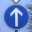

3
Steps per epoch: 249
Data Shapes
Train(7940, 32, 32, 3) (7940,)
Validation(1985, 32, 32, 3) (1985,)
data shape  (6, 2) <class 'pandas.core.frame.DataFrame'>


In [95]:
from google.colab.patches import cv2_imshow
import math
############################### Split Data
X_train, X_validation, y_train, y_validation = train_test_split(images, classNo, test_size=testRatio)
# X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)
 
cv2_imshow(X_train[3])
print(y_train[3])
# X_train = ARRAY OF IMAGES TO TRAIN
# y_train = CORRESPONDING CLASS ID
total_images_train = X_train.shape[0]
total_images_test = X_validation.shape[0]
batch_size = 32
steps_per_epoch_train = math.ceil(total_images_train / batch_size)
print("Steps per epoch:",steps_per_epoch_train)
steps_per_epoch_test = math.ceil(total_images_test / batch_size)

############################### TO CHECK IF NUMBER OF IMAGES MATCHES TO NUMBER OF LABELS FOR EACH DATA SET
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
#print("Test",end = "");print(X_validation.shape,y_validation.shape)
assert(X_train.shape[0]==y_train.shape[0]), "The number of images in not equal to the number of lables in training set"
assert(X_validation.shape[0]==y_validation.shape[0]), "The number of images in not equal to the number of lables in validation set"
#assert(X_test.shape[0]==y_test.shape[0]), "The number of images in not equal to the number of lables in test set"
assert(X_train.shape[1:]==(imageDimesions))," The dimesions of the Training images are wrong "
assert(X_validation.shape[1:]==(imageDimesions))," The dimesionas of the Validation images are wrong "
#assert(X_test.shape[1:]==(imageDimesions))," The dimesionas of the Test images are wrong"
 
 
############################### READ CSV FILE
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))

In [0]:
############################### PREPROCESSING THE IMAGES
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     # CONVERT TO GRAYSCALE
    img = equalize(img)      # STANDARDIZE THE LIGHTING IN AN IMAGE
    img = img/255            # TO NORMALIZE VALUES BETWEEN 0 AND 1 INSTEAD OF 0 TO 255
    return img

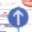

In [97]:
cv2_imshow(X_train[random.randint(0,len(X_train)-1)]) # TO CHECK IF THE TRAINING IS DONE PROPERLY

X_train=np.array(list(map(preprocessing,X_train)))  # TO IRETATE AND PREPROCESS ALL IMAGES
X_validation=np.array(list(map(preprocessing,X_validation)))
#X_test=np.array(list(map(preprocessing,X_test)))


############################### ADD A DEPTH OF 1
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
#X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

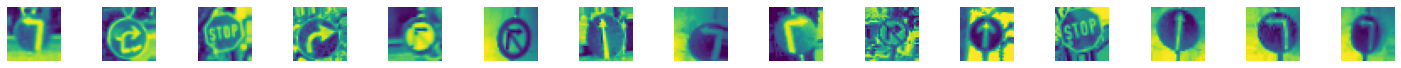

In [98]:
############################### AUGMENTATAION OF IMAGES: TO MAKEIT MORE GENERIC
dataGen= ImageDataGenerator(width_shift_range=0.1,   # 0.1 = 10%     IF MORE THAN 1 E.G 10 THEN IT REFFERS TO NO. OF  PIXELS EG 10 PIXELS
                            height_shift_range=0.1,
                            #zoom_range=0.2,  # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
                            shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
                            rotation_range=10)
                            #brightness_range=[0.8,1.2])  # DEGREES
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=batch_size)  # REQUESTING DATA GENRATOR TO GENERATE IMAGES  BATCH SIZE = NO. OF IMAGES CREAED EACH TIME ITS CALLED
X_batch,y_batch = next(batches)
 
# TO SHOW AGMENTED IMAGE SAMPLES
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0],imageDimesions[1]))
    axs[i].axis('off')
plt.show()
 
 
y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
#y_test = to_categorical(y_test,noOfClasses)

In [99]:
############################### CONVOLUTION NEURAL NETWORK MODEL
def myModel():
    no_Of_Filters=32
    size_of_Filter=(5,5) # THIS IS THE KERNEL THAT MOVE AROUND THE IMAGE TO GET THE FEATURES.
                         # THIS WOULD REMOVE 2 PIXELS FROM EACH BORDER WHEN USING 32 32 IMAGE
    size_of_Filter2=(3,3)
    size_of_pool=(2,2)  # SCALE DOWN ALL FEATURE MAP TO GERNALIZE MORE, TO REDUCE OVERFITTING
    no_Of_Nodes = 1024   # NO. OF NODES IN HIDDEN LAYERS
    model= Sequential()
    model.add((Conv2D(no_Of_Filters,size_of_Filter,input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu')))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
    model.add((Conv2D(no_Of_Filters, size_of_Filter, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool)) # DOES NOT EFFECT THE DEPTH/NO OF FILTERS
 
    model.add((Conv2D(no_Of_Filters //2, size_of_Filter2,activation='relu')))
    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    #model.add(Dropout(0.5))
 
    model.add(Flatten())
    model.add(Dense(no_Of_Nodes,activation='relu'))
    #model.add(Dropout(0.5)) # INPUTS NODES TO DROP WITH EACH UPDATE 1 ALL 0 NONE
    model.add(Dense(noOfClasses,activation='softmax')) # OUTPUT LAYER
    # COMPILE MODEL
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model
 
 
############################### TRAIN
model = myModel()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 10, 10, 16)        4624      
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 8, 8, 16)          2320      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 256)               0         
__________

In [100]:
epochs = 1000

model_checkpoint = ModelCheckpoint(mode='auto', filepath='./Seg_Local-{epoch:03d}_loss-{loss:.4f}_val_loss-{val_loss:.4f}.h5', 
                      monitor='val_loss', 
                      save_best_only='True', 
                      save_weights_only='True', 
                      period=1,
                      verbose=1)
early_stopping = EarlyStopping(monitor='val_loss',
                                min_delta=0.0,
                                patience=10,
                                verbose=1)
reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss',
                                          factor=0.2,
                                          patience=6,
                                          verbose=1,
                                          epsilon=0.001,
                                          cooldown=0,
                                          min_lr=0.00001)
callbacks =* [model_checkpoint, early_stopping ,reduce_learning_rate]

print("Batch size",batch_size,"Steps per Epoch: ",steps_per_epoch_train)

history = model.fit_generator(dataGen.flow(X_train,y_train,batch_size=batch_size),steps_per_epoch=steps_per_epoch_train,epochs=epochs,validation_data=(X_validation,y_validation),shuffle=True,callbacks=callbacks)
 

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Batch size 32 Steps per Epoch:  249
Epoch 1/1000
249/249 [==============================] - 6s 22ms/step - loss: 0.4637 - acc: 0.8417 - val_loss: 0.0926 - val_acc: 0.9668

Epoch 00001: val_loss improved from inf to 0.09262, saving model to ./Seg_Local-001_loss-0.4654_val_loss-0.0926.h5
Epoch 2/1000
249/249 [==============================] - 4s 16ms/step - loss: 0.1334 - acc: 0.9610 - val_loss: 0.0414 - val_acc: 0.9889

Epoch 00002: val_loss improved from 0.09262 to 0.04141, saving model to ./Seg_Local-002_loss-0.1339_val_loss-0.0414.h5
Epoch 3/1000
249/249 [==============================] - 4s 16ms/step - loss: 0.0821 - acc: 0.9745 - val_loss: 0.0299 - val_acc: 0.9935

Epoch 00003: val_loss improved from 0.04141 to 0.02994, saving model to ./Seg_Local-003_loss-0.0824_val_loss-0.0299.h5
Epoch 4/1000
249/249 [==============================] - 4s 16ms/step - loss: 0.0535 - acc: 0.9848 - val_loss: 0.0267 - val_acc: 0.9935

Epoch 00004: val_loss improved from 0.02994 to 0.02672, saving mode

SIGN:  Left 	Probability:  99.9987244606018 %


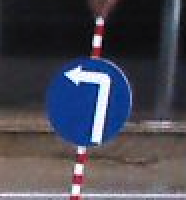

In [105]:
def getCalssName(classNo):
    if   classNo == 0: return 'Stop'
    elif classNo == 1: return 'Right'
    elif classNo == 2: return 'Left'
    elif classNo == 3: return 'Straight'
    elif classNo == 4: return 'No Left'
    elif classNo == 5: return 'No Right'

model.load_weights('./Seg_Local-033_loss-0.0022_val_loss-0.0025.h5')
threshold=0.75
imgOrignal = cv2.imread('/content/Screen Shot 2020-05-24 at 11.55.14.png')
img = np.asarray(imgOrignal)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
#cv2_imshow(img)
img = img.reshape(1, 32, 32, 1)
#cv2.putText(imgOrignal, "CLASS: " , (20, 35), cv2.FONT_HERSHEY_SIMPLEX , 0.75, (0, 0, 255), 2, cv2.LINE_AA)
#cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), cv2.FONT_HERSHEY_SIMPLEX , 0.75, (0, 0, 255), 2, cv2.LINE_AA)
# PREDICT IMAGE
predictions = model.predict(img)
classIndex = model.predict_classes(img)
probabilityValue =np.amax(predictions)
print("SIGN: ",getCalssName(classIndex),"\tProbability: ", probabilityValue*100, "%")
# if probabilityValue > threshold:
#     cv2.putText(imgOrignal,str(classIndex)+" "+str(getCalssName(classIndex)), (120, 35), cv2.FONT_HERSHEY_SIMPLEX , 0.75, (0, 0, 255), 2, cv2.LINE_AA)
#     cv2.putText(imgOrignal, str(round(probabilityValue*100,2) )+"%", (180, 75), cv2.FONT_HERSHEY_SIMPLEX , 0.75, (0, 0, 255), 2, cv2.LINE_AA)
cv2_imshow(imgOrignal)